# BINA Leistungsnachweis
##Gruppe Francesca, Joris, Manuel & Ryan

***Step 0*** – Wie schneidet die Schweiz im Vergleich zu anderen Nationen im OECD Better Life Index ab und welche Faktoren beeinflussen das Ergebnis der Schweiz?  

Im Rahmen der Arbeit möchten wir untersuchen, wie die Schweiz im Vergleich zu anderen Ländern im OECD Better Life Index abschneidet.

Dabei wird untersucht, wo sich die Schweiz in den untersuchten Jahren positioniert hat und welche Faktoren ein vermeintlich besseres oder schlechteres Abschneiden zum Vorjahr respektive zu den anderen Ländern beeinflussen. Abschliessend können darauf mögliche Massnahmen definiert werden.



**Step 1** – Defining objectives and information needs:  

**Problemdefinition:**

Trotz des hohen Lebensstandards in der Schweiz und vielen Ländern der Europäischen Union (EU) variieren die Niveaus der Lebenszufriedenheit innerhalb dieser Regionen erheblich. Während finanzielle Sicherheit, Gesundheitsversorgung und Bildung oft als Kernindikatoren für Lebensqualität angesehen werden, gibt es eine Reihe weiterer Faktoren, die das Wohlbefinden und die Lebenszufriedenheit der Einwohner:innen beeinflussen können. Zu diesen Faktoren gehören soziale Beziehungen, Arbeitsbedingungen, Work-Life-Balance, Umweltqualität und persönliche Freiheiten. Es ist wichtig zu verstehen, welche Aspekte den grössten Einfluss auf die Lebenszufriedenheit haben, um politische und gesellschaftliche Massnahmen zu entwickeln, die das allgemeine Wohlbefinden fördern.

**Hypothesen:**


**Ziel der Untersuchung:**

Das Ziel ist es, zu verstehen, welche Faktoren die grösste Rolle in der Lebenszufriedenheit der Menschen in der Schweiz und der EU spielen und wie politische Massnahmen gestaltet werden können, um das Wohlbefinden zu verbessern. Es soll auch untersucht werden, welche Best Practices aus anderen Ländern übernommen werden können, um die Lebenszufriedenheit in der Schweiz weiter zu steigern.

**Vorgehen**

Benchmarking: Um die Positionierung und deren Entwicklung der Schweiz in ein Verhältnis zu setzen wird ein Benchmark erstellt. Daraus wird ersichtlich wo die Schweiz zum Zeitpunkt des Untersuchungsstart positioniert ist und wie sich die Positionierung im Laufe der Zeit verändert hat.

Untersuchung Benchmarking: Das erstellte Benchmarking wird anschliessend auf Auffälligkeiten untersucht. Jahre, in der die Schweiz vom Benchmark positiv sowie negativ auffällt, werden im Schritt drei genauer analysiert.

Auffälligkeiten untersuchen: Um herauszufinden, weshalb die Schweiz in einigen Jahren besser oder schlechter als der Benchmark abgeschnitten hat, werden die Daten des Bundesamtes für Statistik (BFS) im Zusammenhang mit der Zufriedenheit der Schweiz untersucht. Dabei werden die Jahre des auffälligen Abschneidens sowie die hervorgehenden Jahre berücksichtigt.

**What are our strategic aims?**

Welche Faktoren führten zu besonders guten oder schlechten Ergebnissen im OECD Better Life Index und was kann politisch sowie gesellschaftilch unternommen werden, um die Lebensqualität der Schweizer:innen zu erhöhen?

**What do we need to know and what questions need to be anwesered?**

Wie verändert sich die subjektive Wahrnehmung der Lebensqualität während des Untersuchungszeitraum in der Schweiz sowie den Teilnehmenden des OECD Better Life Indexes?

**Wie steht die Schweiz da im internationalen Vergleich (EU-Länder)?**

**Welche Faktoren waren ausschlaggebend für auffällige Resultate?**



**Who needs the information (leadership or business units)?**

Business Unit Level: Stadtplanung Behörde / Politik
Die Daten werden verwendet, um die städtische Entwicklung und Infrastrukturprojekte zu leiten, mi dem Ziel, die Lebensqualität zu verbessern.  

**What decision needs to be taken?**


**Step 2 – Collecting Data**

OECD Better Life Index-Daten

BFS-Daten  

Gathering and organising the right data. Emphasis on finding meaningful and relevant data to meet the information needs identified in Step 1. Organisations need to either:

Assess whether the required data is already held somewhere in the organisation

Identify the best way to collect the data

**2.1 Supporting internal data with external data > provide internal & external**

**2.2 Balancing structured data (excel) with unstructured data (website, social media, video content)**

**2.3 Identifying data collection formats (activity data, conversation data, photo and video data, sensor data)**

In [ ]:
import pandas as pd
import tempfile
import os
import numpy as np

csv_url = 'https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/oecd_data_2007bis2022.csv'
#csv_url = 'https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/ryan_test.csv'
df = pd.read_csv(csv_url, delimiter=';')

# using unique measurements (e.g. 1_1, 1_2 etc.)
raw_categories = df['MEASURE'].unique()
categories = [x for x in raw_categories if str(x) != 'nan'] #removed coutnry "nan" from list

# reverse ranking means that a measurement with a small value has a higher ranking than one with a large value
categories_reverse_ranking = ["1_2", "2_8_DEP", "2_8_VER", "11_1_VER", "11_1_DEP","11_2",
                              "2_4","7_3_VER", "7_3_DEP", "4_4_VER", "4_4_DEP",
                              "2_5", "3_1", "3_3", "3_4", "2_3", "1_4","1_5",
                              "1_6", "9_2", "5_2_DEP", "5_3", "5_4", "7_1_DEP",
                              "8_1_DEP", "10_1", "10_2_DEP", "10_3",] #TODO: List fertig machen! Alle durchgehen

irrelevant_categories = ["4_1", "4_2", "4_3", "6_1_DEP", "6_1_VER", "6_2_DEP",
                         "6_2_VER", "6_3_DEP", "6_3_VER", "6_4", "6_4_DEP",
                         "6_4_VER", "6_5", "6_5_DEP", "6_5_VER", "7_2", "8_1",
                         "1_3", "1_3_VER", "1_6","2_6", "5_4", "8_1_DEP"]

category_rules = {}
all_category_rankings = []

temp_dir = tempfile.mkdtemp()

for category in categories:
  category_df = df[df['MEASURE'] == category]
  if category in irrelevant_categories:
    continue
  #-----STEP 0 -------------------------------------------------------------
  # write temp. files for eventual checks
  temp_file_path = os.path.join(temp_dir, f'{category}.csv')
  category_df.to_csv(temp_file_path, index=False)
  #print(f"Data for category {category} written to {temp_file_path}")
  #------------------------------------------------------------------

  #-----STEP 1 -------------------------------------------------------------
  # collect data and transform to correct rating
  country_means = {}
  countries = category_df['Reference area'].unique()
  # collect means of each country per measurement
  for country in countries:
    country_df = category_df[df['Reference area'] == country]
    try:
      avg_value = country_df['OBS_VALUE'].mean()
    except Exception as e:
      print("Error while calculating mean for {} and {}".format(country, category))
      raise

    country_means[country] = avg_value


  #-----STEP 2 -------------------------------------------------------------
  # calculate ranking with min & max value
  average_values = list(country_means.values())
  # get min and max per measurement
  min_value = np.nanmin(average_values)
  max_value = np.nanmax(average_values)
  category_rules[category] = {'min': min_value, 'max': max_value}

  min = category_rules[category]["min"]
  max = category_rules[category]["max"]

  #print("------------{}-----------".format(category))

  measurement_ranking = []
  if category in categories_reverse_ranking:
    for key, value in country_means.items():
        #print(key)
        #print("Value: {}".format(value))
        #print("Min: {}".format(min))
        #print("Max: {}".format(max))
        ranking = (value-max)/(min-max)*9+1
        measurement_ranking.append({key:ranking})
        #print("Ranking: {}".format(ranking))
        #print("----")
  else:
    for key, value in country_means.items():
        #print(key)
        #print("Value: {}".format(value))
        #print("Max: {}".format(max))
        #print("Min: {}".format(min))
        ranking = (value-min)/(max-min)*9+1
        measurement_ranking.append({key:ranking})
        #print("Ranking: {}".format(ranking))
        #print("----")
  #print(category)
  #print(measurement_ranking)

  all_category_rankings.append({category:measurement_ranking})
for ranking in all_category_rankings:
  print(ranking)


<ipython-input-1-ef02f0c7dc4e>:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_df = category_df[df['Reference area'] == country]
<ipython-input-1-ef02f0c7dc4e>:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_df = category_df[df['Reference area'] == country]
<ipython-input-1-ef02f0c7dc4e>:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_df = category_df[df['Reference area'] == country]
<ipython-input-1-ef02f0c7dc4e>:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_df = category_df[df['Reference area'] == country]
<ipython-input-1-ef02f0c7dc4e>:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_df = category_df[df['Reference area'] == country]
<ipython-input-1-ef02f0c7dc4e>:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_df = category_df[df['Ref

{'1_1': [{'Germany': 6.93715272974969}, {'Belgium': 6.333663911558145}, {'Poland': 2.21860442052682}, {'Latvia': 1.0}, {'Finland': 5.723668791936675}, {'Netherlands': 6.191112491420189}, {'France': 6.13600858111476}, {'Switzerland': 8.46110703687948}, {'Ireland': 4.512815560839007}, {'Estonia': 1.8336756557845537}, {'Norway': 6.989179652736275}, {'Italy': 4.77210459147056}, {'Hungary': 1.6041699833231982}, {'Spain': 4.003468461532439}, {'Czechia': 3.005725962830828}, {'Denmark': 5.441079216112034}, {'Austria': 7.129758042837718}, {'United Kingdom': 5.365587328762654}, {'Slovak Republic': 2.251958023524989}, {'Lithuania': 2.654174289539548}, {'Greece': 2.5120691500050896}, {'Luxembourg': 10.0}, {'Portugal': 3.0280634814584766}, {'Slovenia': 2.9409917868709985}, {'Sweden': 6.011872107984246}]}
{'1_2': [{'Netherlands': 8.100837064434494}, {'Iceland': 9.70986957368114}, {'Germany': 8.171477516059959}, {'Finland': 9.56728051391863}, {'Poland': 7.93404710920771}, {'Belgium': 9.69678800856531

In the follwing code I will do something...

In [ ]:
for entry in all_category_rankings:
  for key, value in entry.items():
    if key.startswith("6_"):
      print(key)
      print(value)



6_1
[{'Iceland': 4.4531622364802885}, {'Latvia': 4.479890009165897}, {'Netherlands': 6.73228230980751}, {'Finland': 10.0}, {'Belgium': 6.685426214482117}, {'Poland': 7.684582951420713}, {'Israel': 3.491952337305224}, {'Germany': 6.897268560953254}, {'Switzerland': 6.016241979835014}, {'France': 6.258771769019245}, {'Portugal': 5.4008432630614}, {'Slovenia': 5.3331989000916495}, {'Sweden': 6.051549037580199}, {'Spain': 4.929862511457376}, {'Italy': 4.404986251145733}, {'United Kingdom': 6.33730522456462}, {'Denmark': 6.224784601283217}, {'Lithuania': 2.992373968835934}, {'Luxembourg': 3.565866177818515}, {'Hungary': 4.118240146654438}, {'Czechia': 4.791384051329051}, {'Greece': 2.675600366636113}, {'Austria': 4.151237396883593}, {'Ireland': 8.393033913840505}, {'Norway': 7.142768102658114}, {'Slovak Republic': 1.5626031164069647}, {'Estonia': 8.449459211732348}, {'Türkiye': 1.0}]
6_2
[{'Czechia': 6.824163323953781}, {'Denmark': 7.908010537029272}, {'Lithuania': 4.976531162066702}, {'Uni

These Graphs give an overview over the different rankings per category

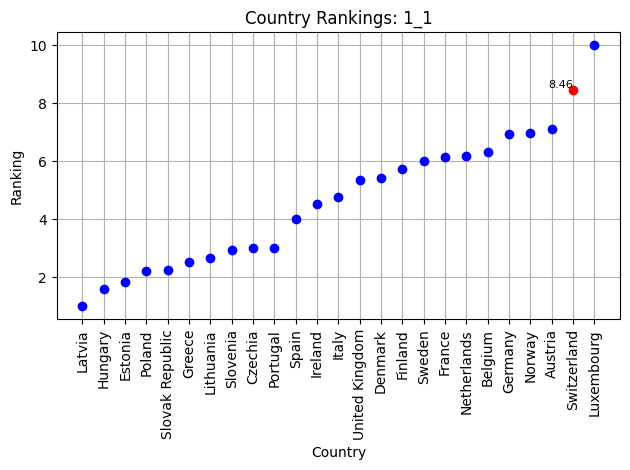

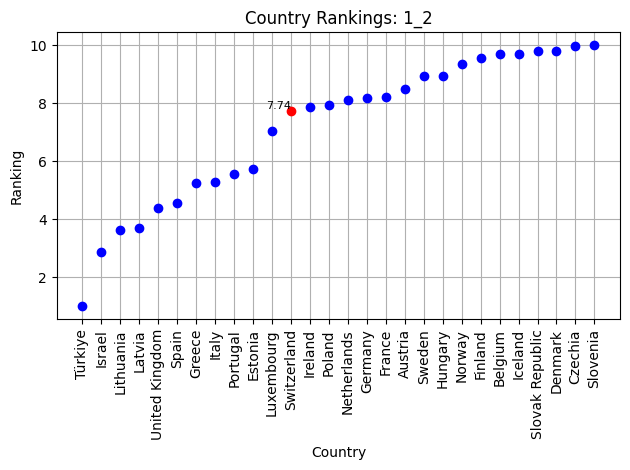

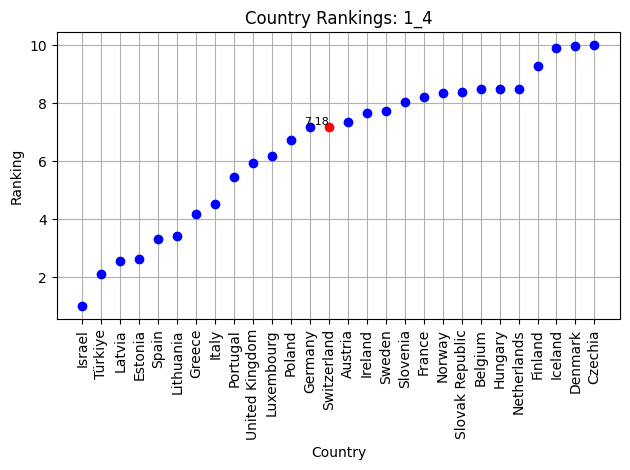

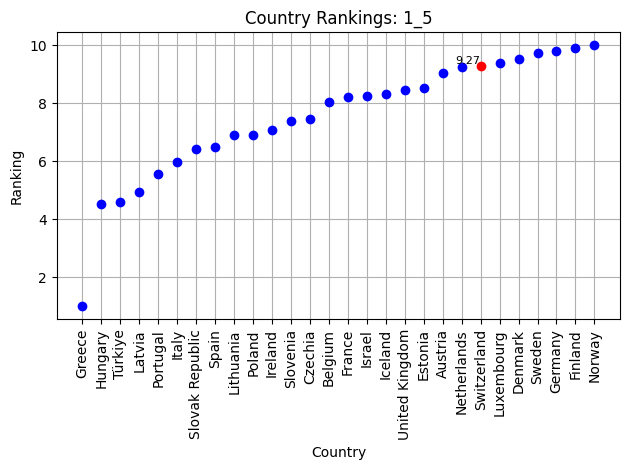

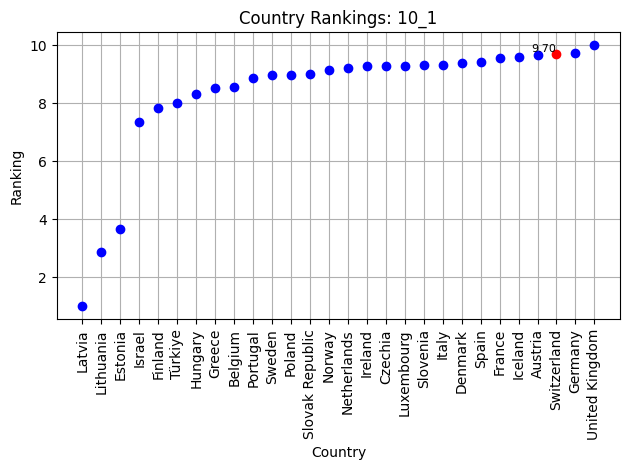

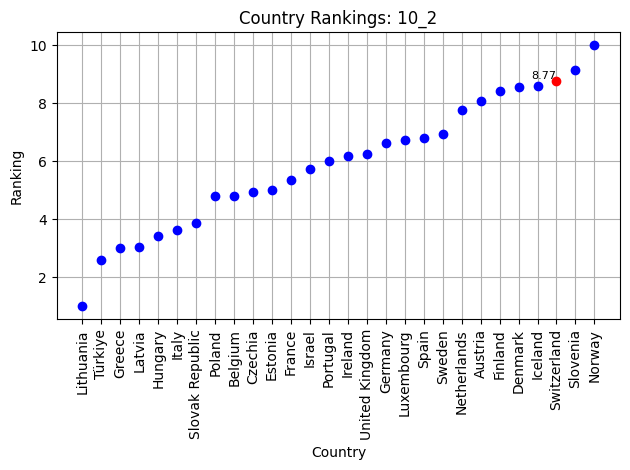

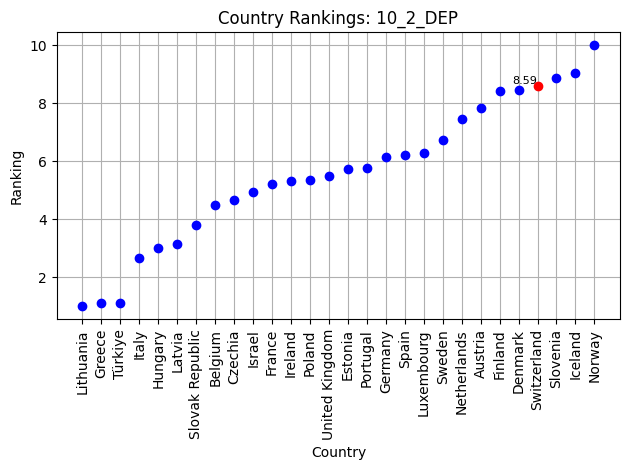

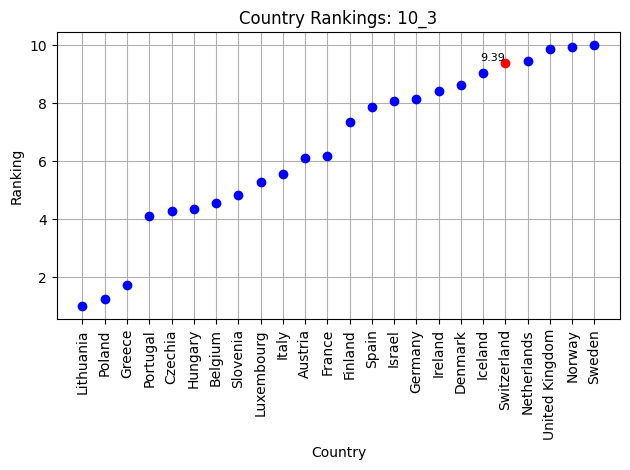

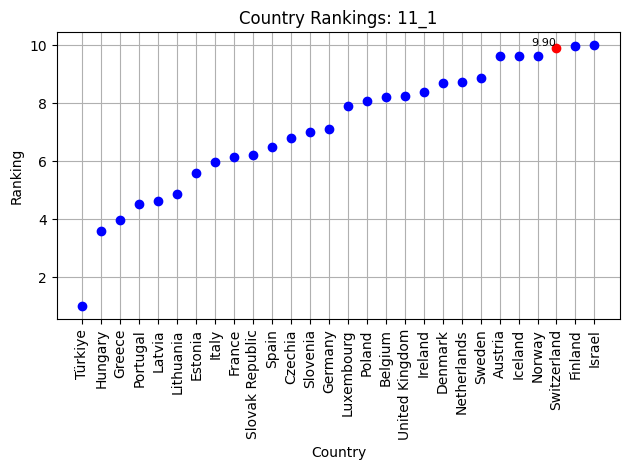

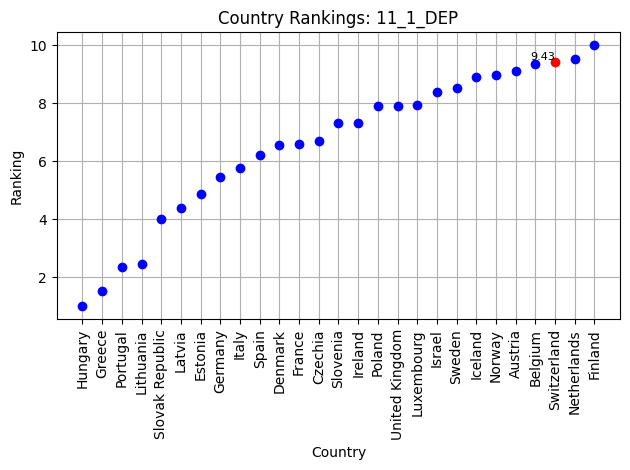

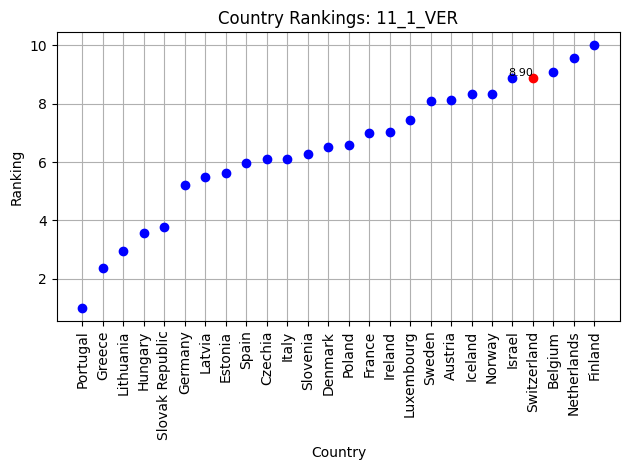

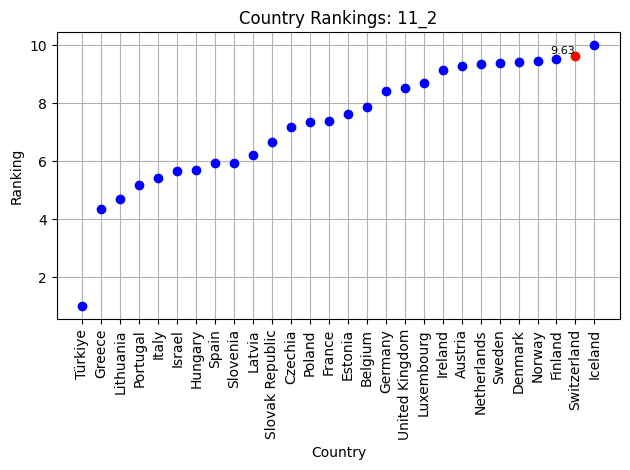

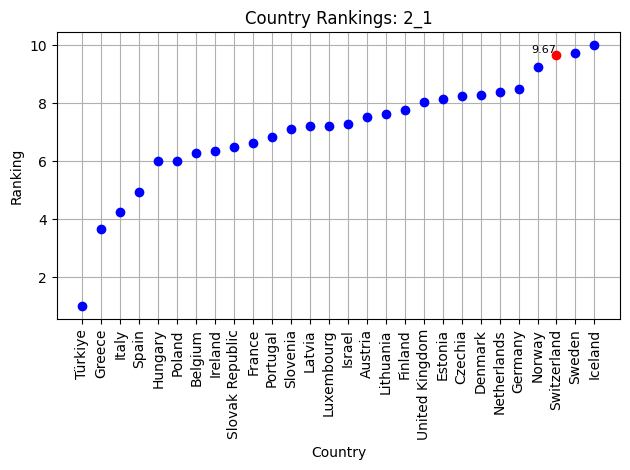

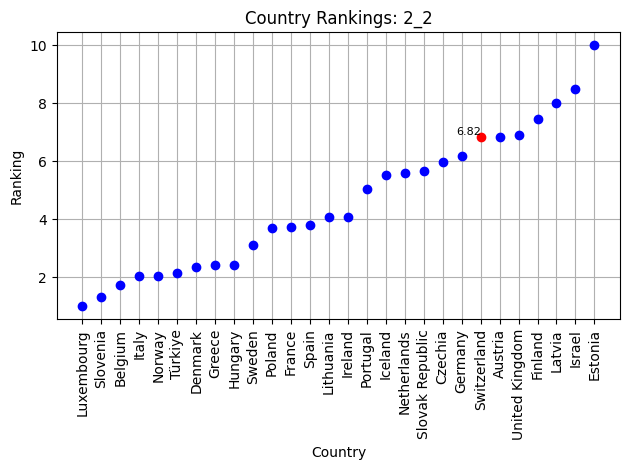

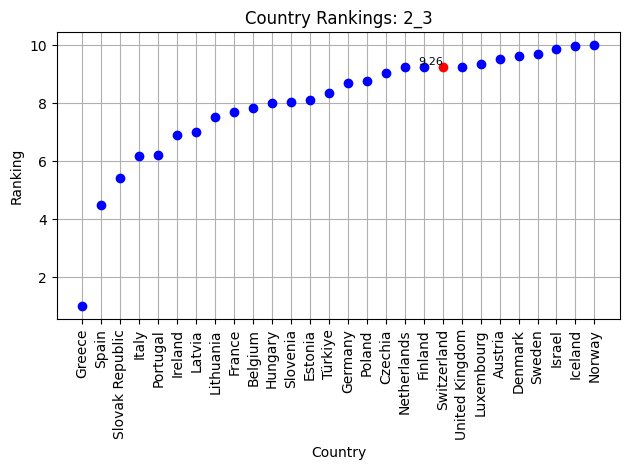

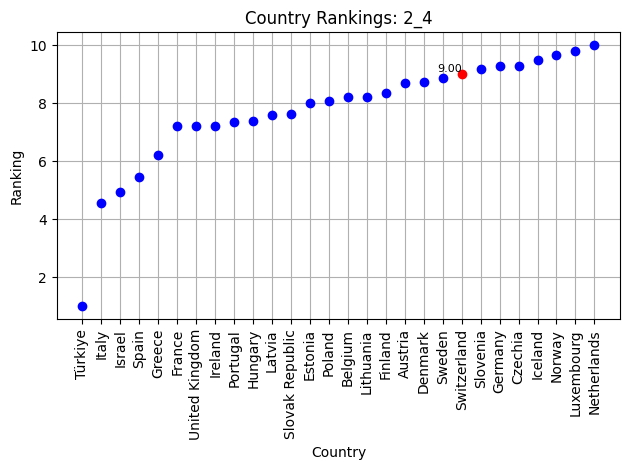

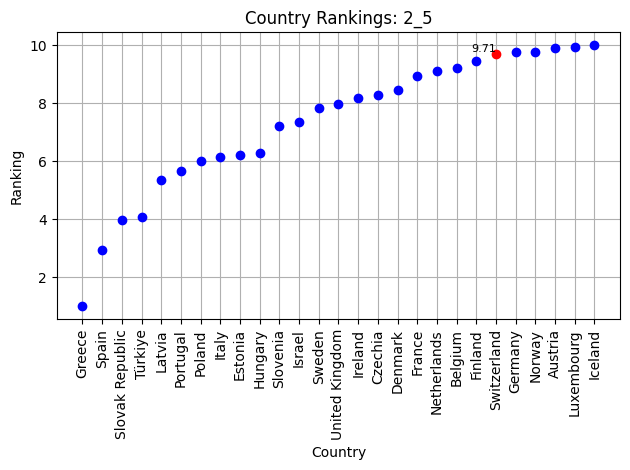

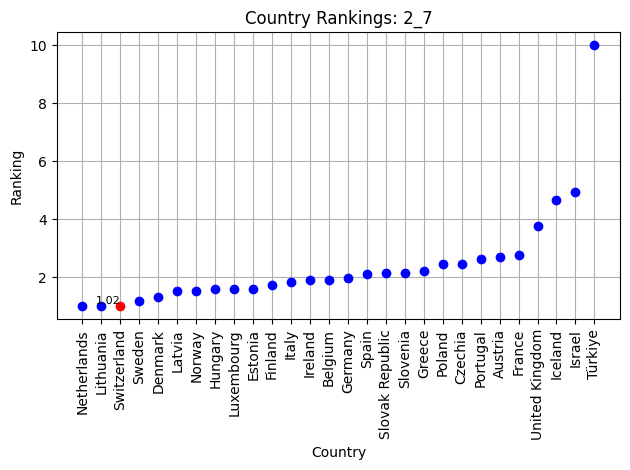

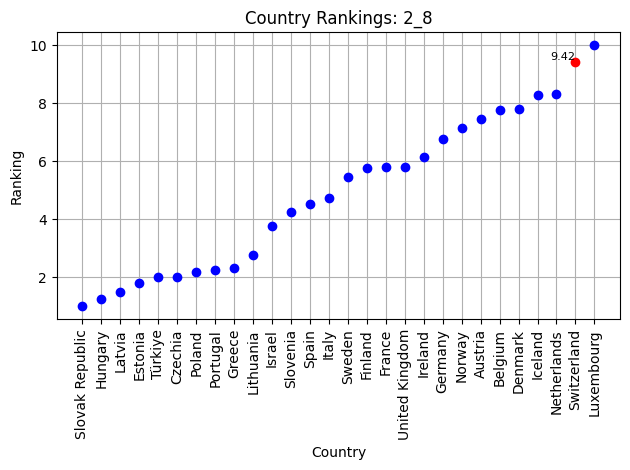

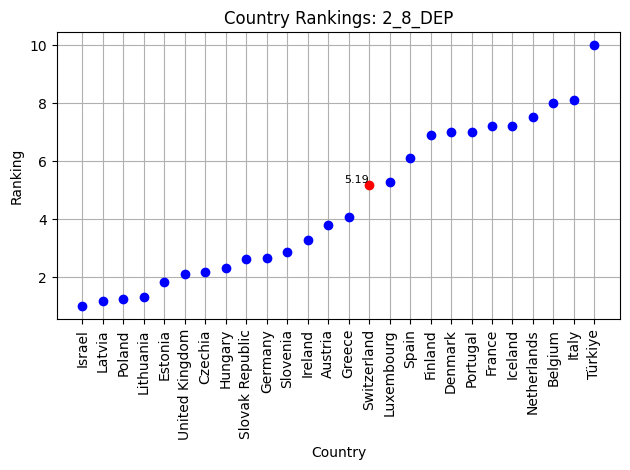

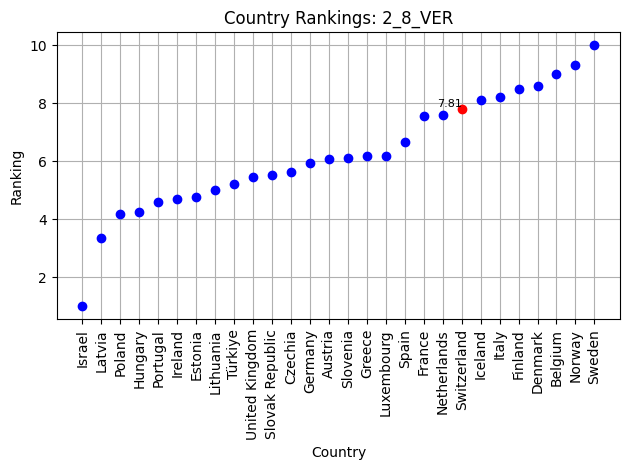

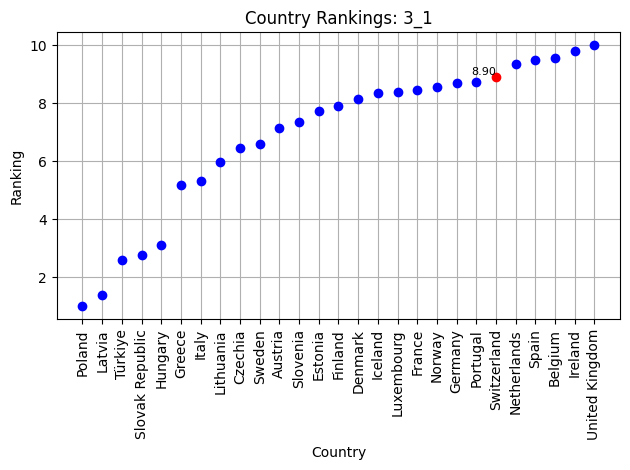

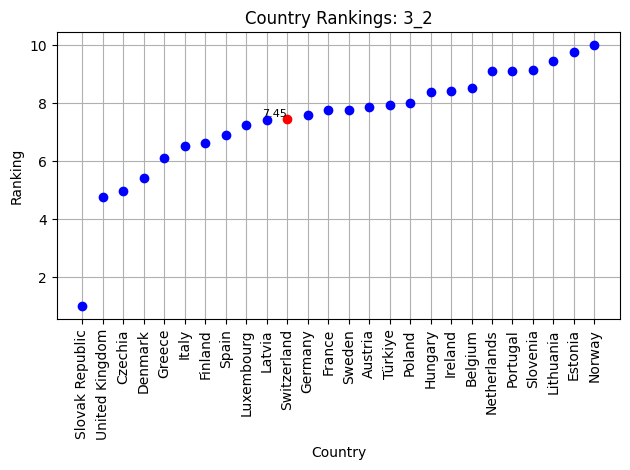

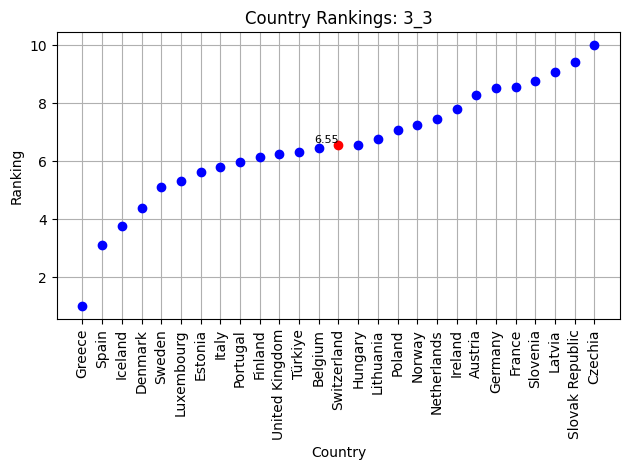

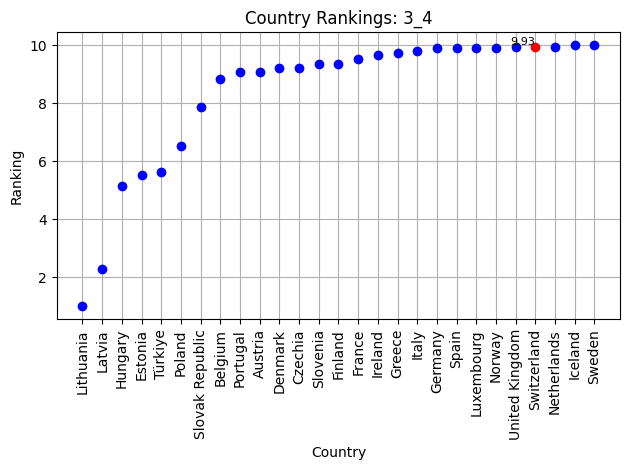

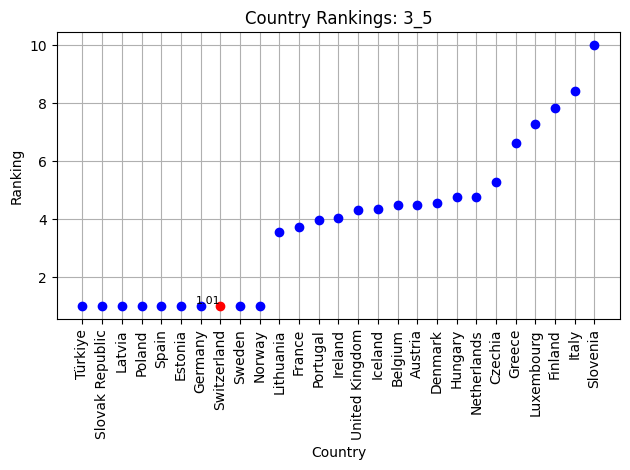

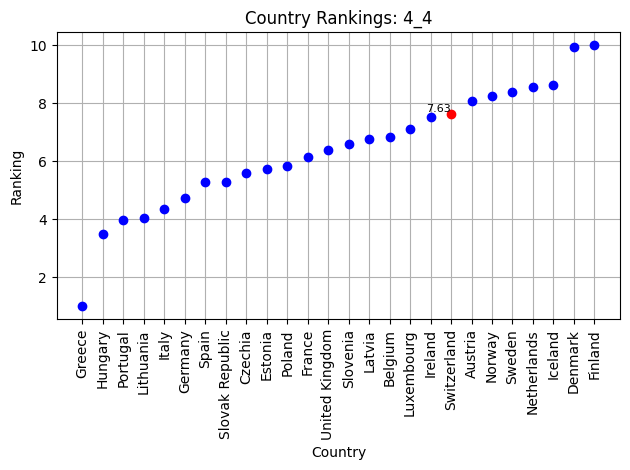

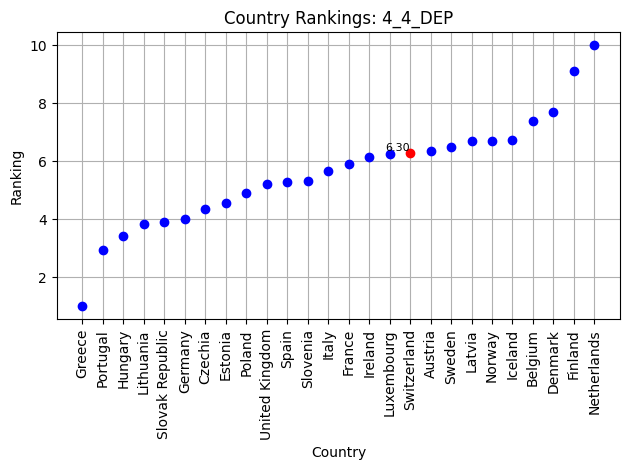

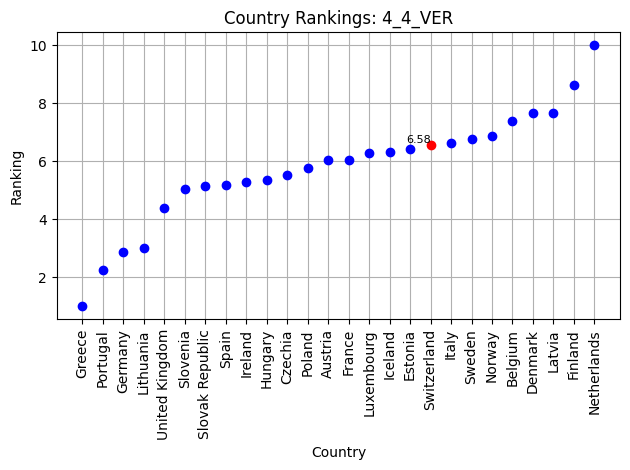

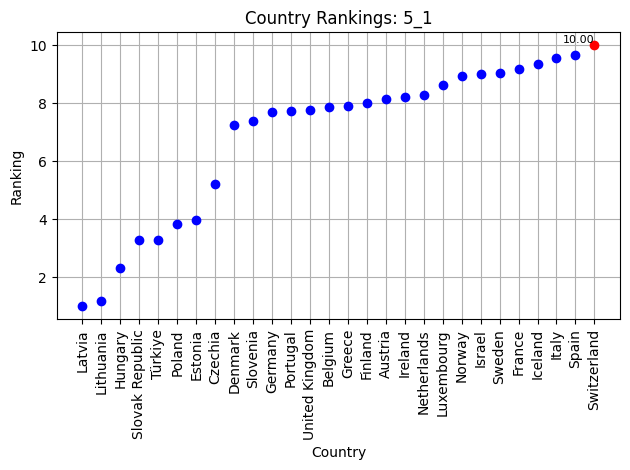

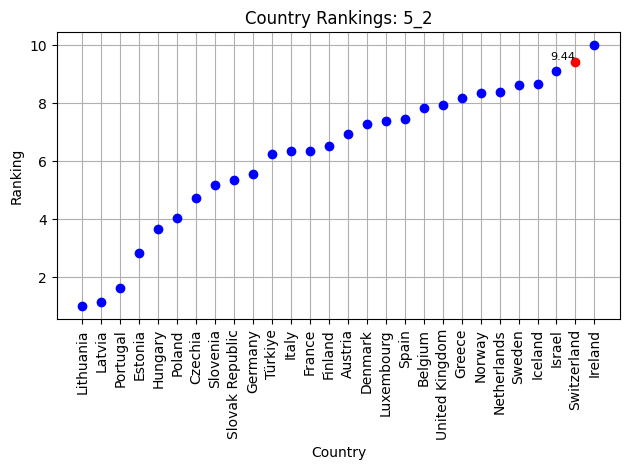

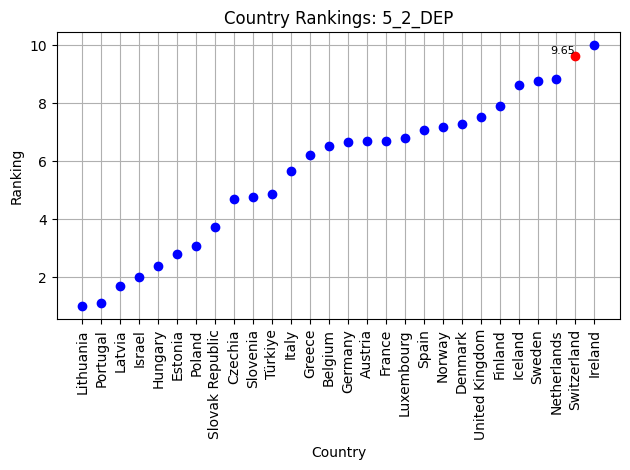

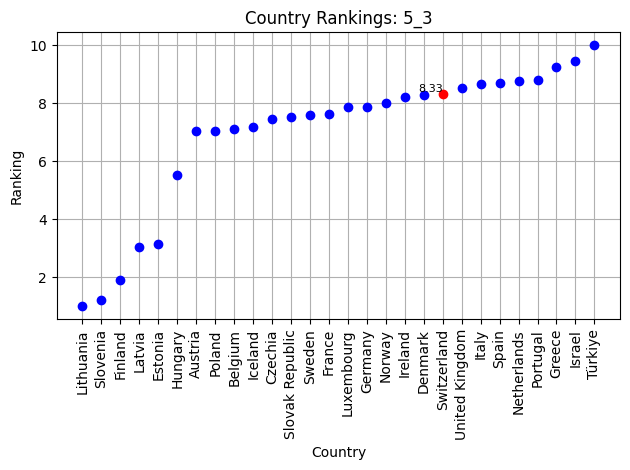

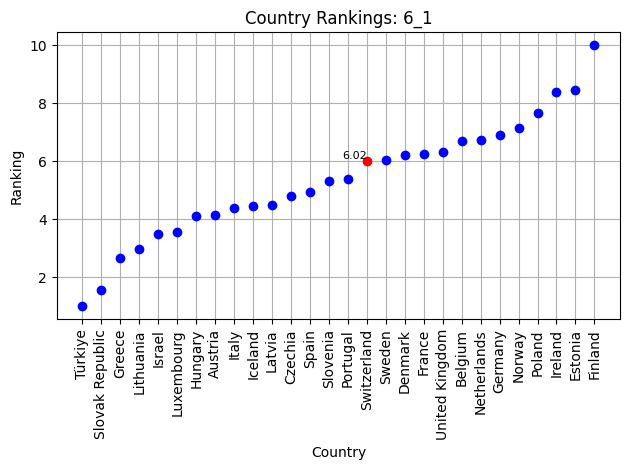

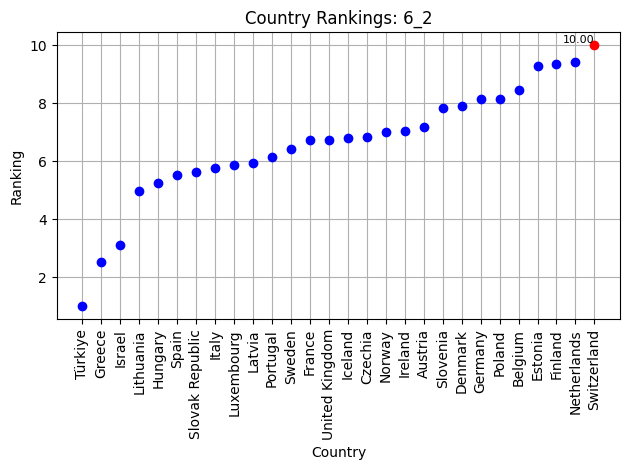

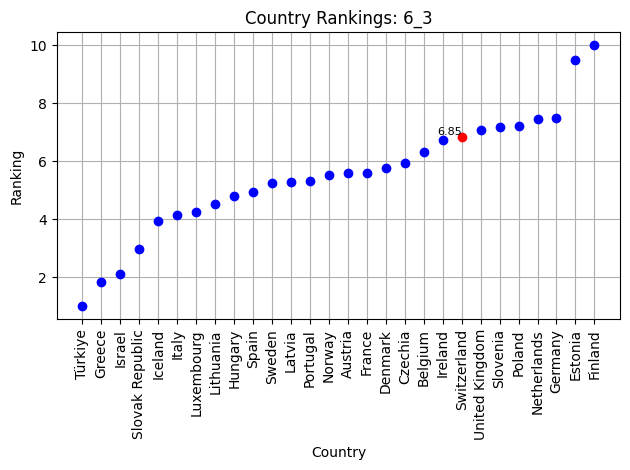

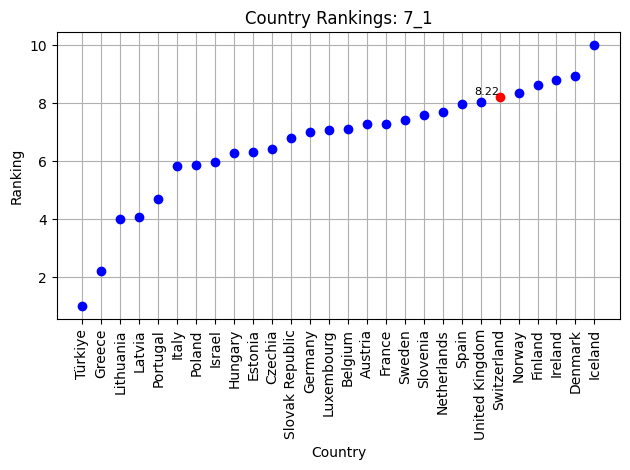

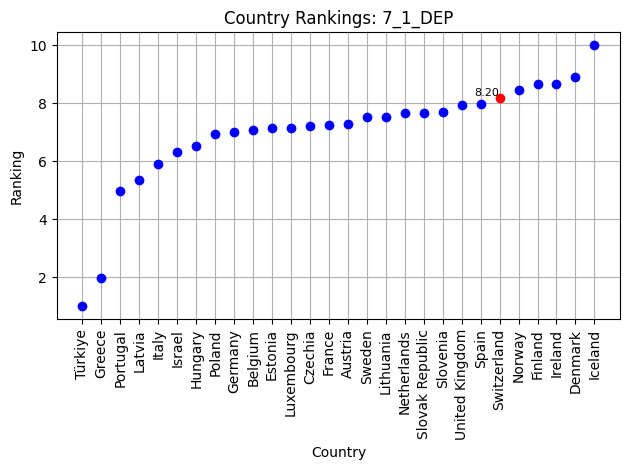

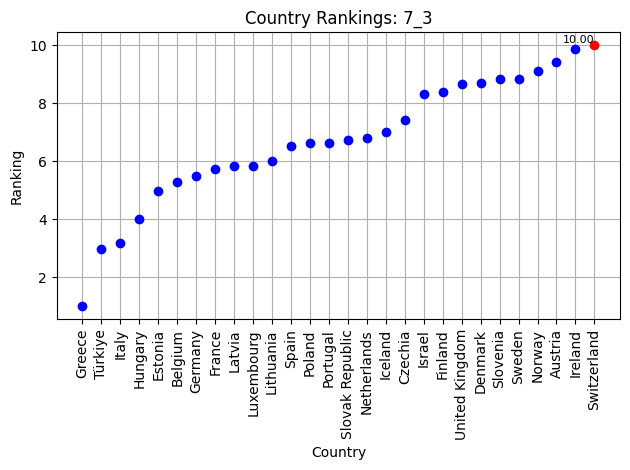

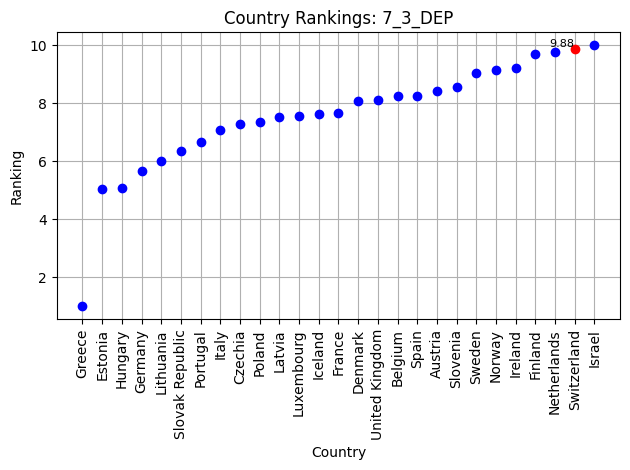

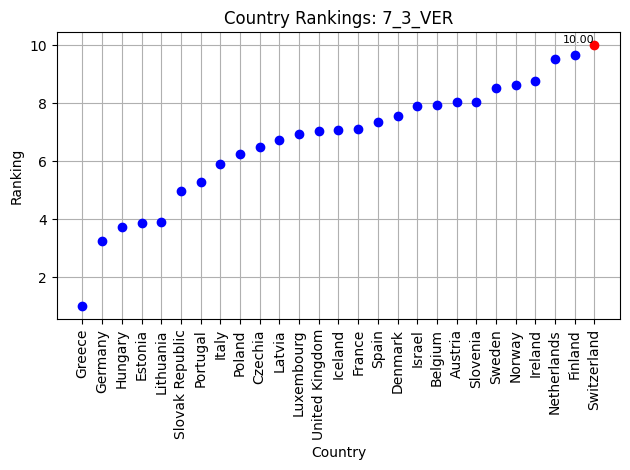

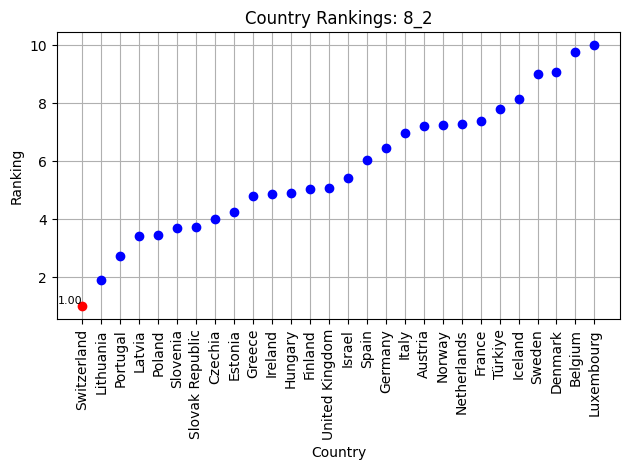

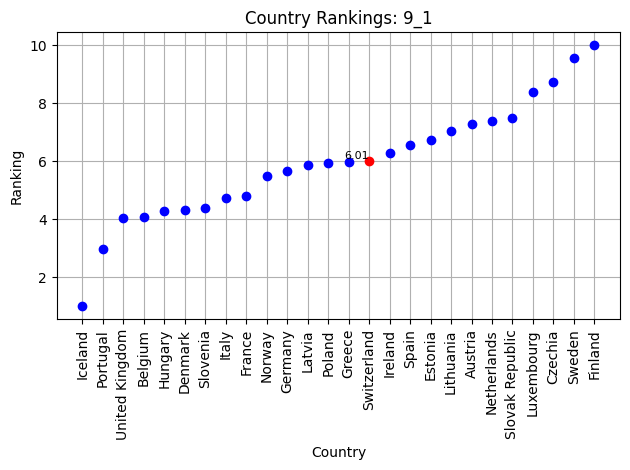

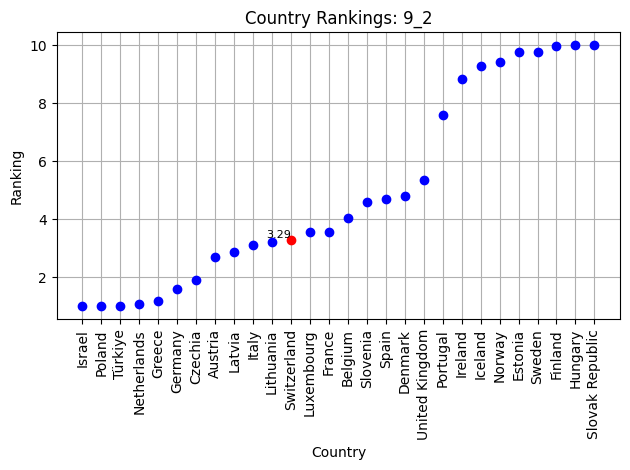

In [56]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(6, 3))

for idx, data in enumerate(all_category_rankings):
    for key, value in data.items():
        countries = []
        rankings = []

        for entry in value:
            country = list(entry.keys())[0]
            rank = entry[country]
            countries.append(country)
            rankings.append(rank)

        # Sort rankings and corresponding countries
        sorted_data = sorted(zip(rankings, countries), reverse=True)

        sorted_rankings, sorted_countries = zip(*sorted_data)

        #Plot the line plot with markers
        for i, (country, rank) in enumerate(zip(sorted_countries, sorted_rankings)):
            if country == 'Switzerland':
                plt.plot(country, rank, marker='o', color='red', label=country)
                #plt.text(sorted_rankings[i], i, sorted_rankings[i])
                plt.text(country, rank, f'{rank:.2f}', ha='right', va='bottom', fontsize=8)
            else:
                plt.plot(country, rank, marker='o', color='blue', label=country)
            #plt.text(country, rank, f'{rank:.2f}', ha='right', va='bottom', fontsize=8)




    plt.xlabel('Country')
    plt.ylabel('Ranking')
    plt.title('Country Rankings: {}'.format(key))
    plt.grid(True)
    #plt.legend(title='Data Set', loc='upper left')
    plt.xticks(rotation=90)
    #plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()

**Step 3 – Analysing data:**

Once the right data has been collected, it must be turned into insights. To do this, the data must be analysed to extract information.

**3.1 Looking at the different analytics option (correlation, regression, data mining, text analytics, image analytics, sound and voice analytics, sentiment analysis, AI and advanced analytics, augmented analytics)**

**3.2 Combining analytics for maximum effect > work with 2 techniques.**

**Step 4 – Presenting information:**  

This is about communicating the information extracted. the focus here is on getting the right information, in the right format, to the right people, at the right time.

**4.1 Decide what type of report (frequency, outlet, and how to show the data)**

**4.2 Starting with the question**

**4.3 Using headlines**

**4.4 Using effective visuals**

**4.5 Using narratives to support visuals**

**4.6 Getting the most out of self-service tools**